# <span style="color:blue">Hugging Face 에 올려진 사전학습된 모델 활용</span>

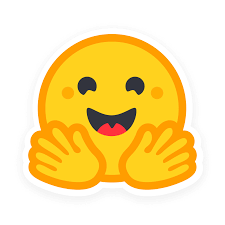

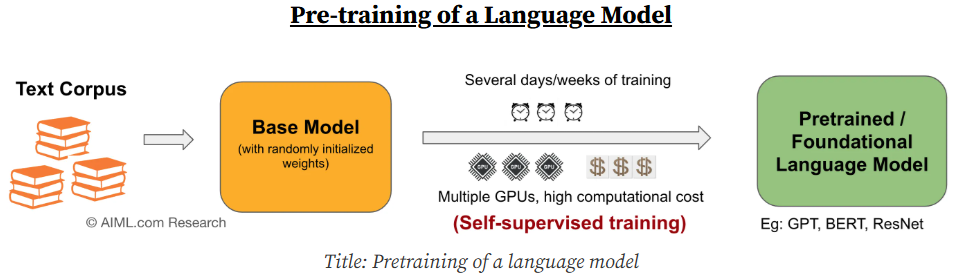

‘Pre-training’이란?
Pre-training(사전학습)이란 모델을 바로 주어진 데이터에 학습시키기 이전에 다른 데이터에 먼저 학습을 시키는 것을 말한다. Pre-train된 모델의 parameter를 이용해서 모델을 initialize한 뒤, 여기서부터 실제 풀려고 하는 문제의 데이터에 Fine-tuning(미세조정)하게 되면 임의로 initialize된 parameter를 가진 모델을 처음부터 학습시키는 것 보다 더 높은 성능을 제공한다.

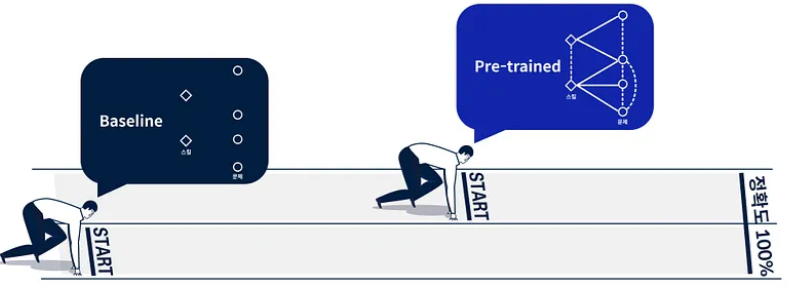

#### 미리 설치할 라이브러리
- conda install -n base -c conda-forge widgetsnbextension
- pip3 install torch torchvision torchaudio

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from transformers import logging

logging.set_verbosity_error()

# <span style="color:red">pipeline() 사용</span>

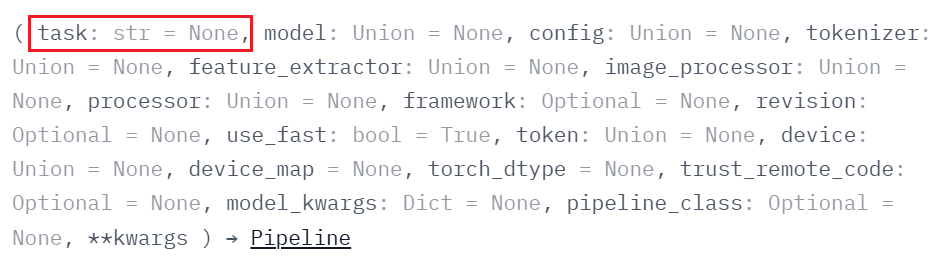

### 텍스트 기반 감정분석

In [ ]:
from transformers import pipeline
classifier = pipeline("text-classification")
classifier("I've been waiting for a HuggingFace course my whole life.")

In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis", "distilbert-base-uncased-finetuned-sst-2-english")
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

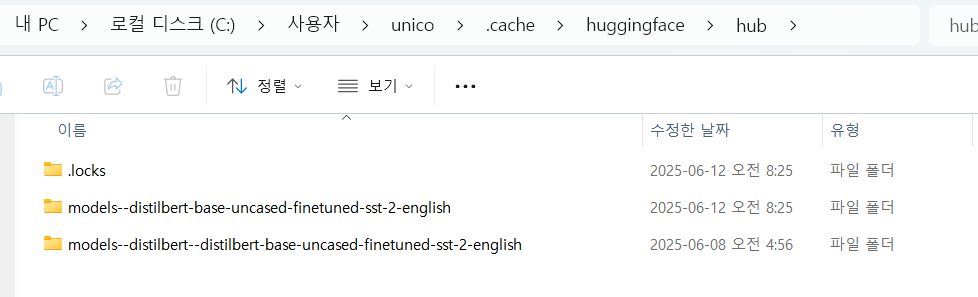

In [ ]:
from transformers import pipeline

sentiment_model = pipeline(model="WhitePeak/bert-base-cased-Korean-sentiment")

In [ ]:
sentiment_model("매우 좋아")

In [ ]:
from transformers import pipeline

pipe = pipeline(
    task="text-classification",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest"
)
raw_text = [
    "I love you.",
    "I hate you.",
    "I meet with you."
]
pipe(raw_text)

In [ ]:
import torch
import torch.nn.functional as F
from transformers import pipeline

inputs = pipe.tokenizer(raw_text, padding=True, return_tensors="pt")
outputs = pipe.model(inputs["input_ids"])
probabilities = F.softmax(outputs.logits, dim=1)
prediction = []
for prob in probabilities:
    max_idx = torch.argmax(prob).item()
    class_name = pipe.model.config.id2label[max_idx]
    score = prob[max_idx].item()
    prediction.append({"label": class_name, "score": score})

print("- 텍스트 :")
print(raw_text)

print("- 토큰나이징까지의 결과 :")
print(inputs["input_ids"])

print("- 로짓값 :")
print(outputs["logits"])

print("- 예측값 :")
print(prediction)

### 마스크 채우기

In [ ]:
from transformers import pipeline
unmasker = pipeline("fill-mask","distilroberta-base")  # 마스크 채우기
unmasker("I'm going to hospital and meet a <mask>.", top_k=2)

In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')
unmasker("Hello I'm a [MASK] model.")

In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-multilingual-cased')
unmasker("안녕하세요? 나는 [MASK] 모델입니다.")

### 질의 응답

In [ ]:
from transformers import pipeline
question_answerer = pipeline("question-answering", "distilbert-base-cased-distilled-squad")  # 질의 응답
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

### 문서 요약

In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization","sshleifer/distilbart-cnn-12-6")  # 요약
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.
 
    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

### 개체명 인식

In [ ]:
from transformers import pipeline
ner = pipeline("ner", "dbmdz/bert-large-cased-finetuned-conll03-english", grouped_entities=True)  # 개체명 인식 - NER(Named Entity Recognition)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.") 

In [ ]:
print(ner.model.config)

### 제로샷 분류

제로샷(Zero-shot)은 기계 학습 및 자연어 처리에서 각 개별 작업에 대한 특정 교육 없이 작업을 수행할 수 있는 모델 유형

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification","facebook/bart-large-mnli")  # 제로샷 분류
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
) 

### 텍스트 생성

In [ ]:
from transformers import pipeline
generator = pipeline("text-generation", "gpt2")  # 텍스트 생성
generator("In this course, we will teach you how to", pad_token_id=generator.tokenizer.eos_token_id)

### 번역

In [ ]:
from transformers import pipeline
translator = pipeline("translation", "Helsinki-NLP/opus-mt-fr-en")  # 프랑스어 -> 영어

In [ ]:
translator("Ce cours est produit par Hugging Face.")

In [ ]:
from transformers import pipeline
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ko-en")  # 한국어 -> 영어번역
translator("이 문장을 영어로 번역해주세요.")

In [ ]:
translator(["안녕하세요? 즐거운 하루 보내세요.", "나는 피자를 좋아합니다"])

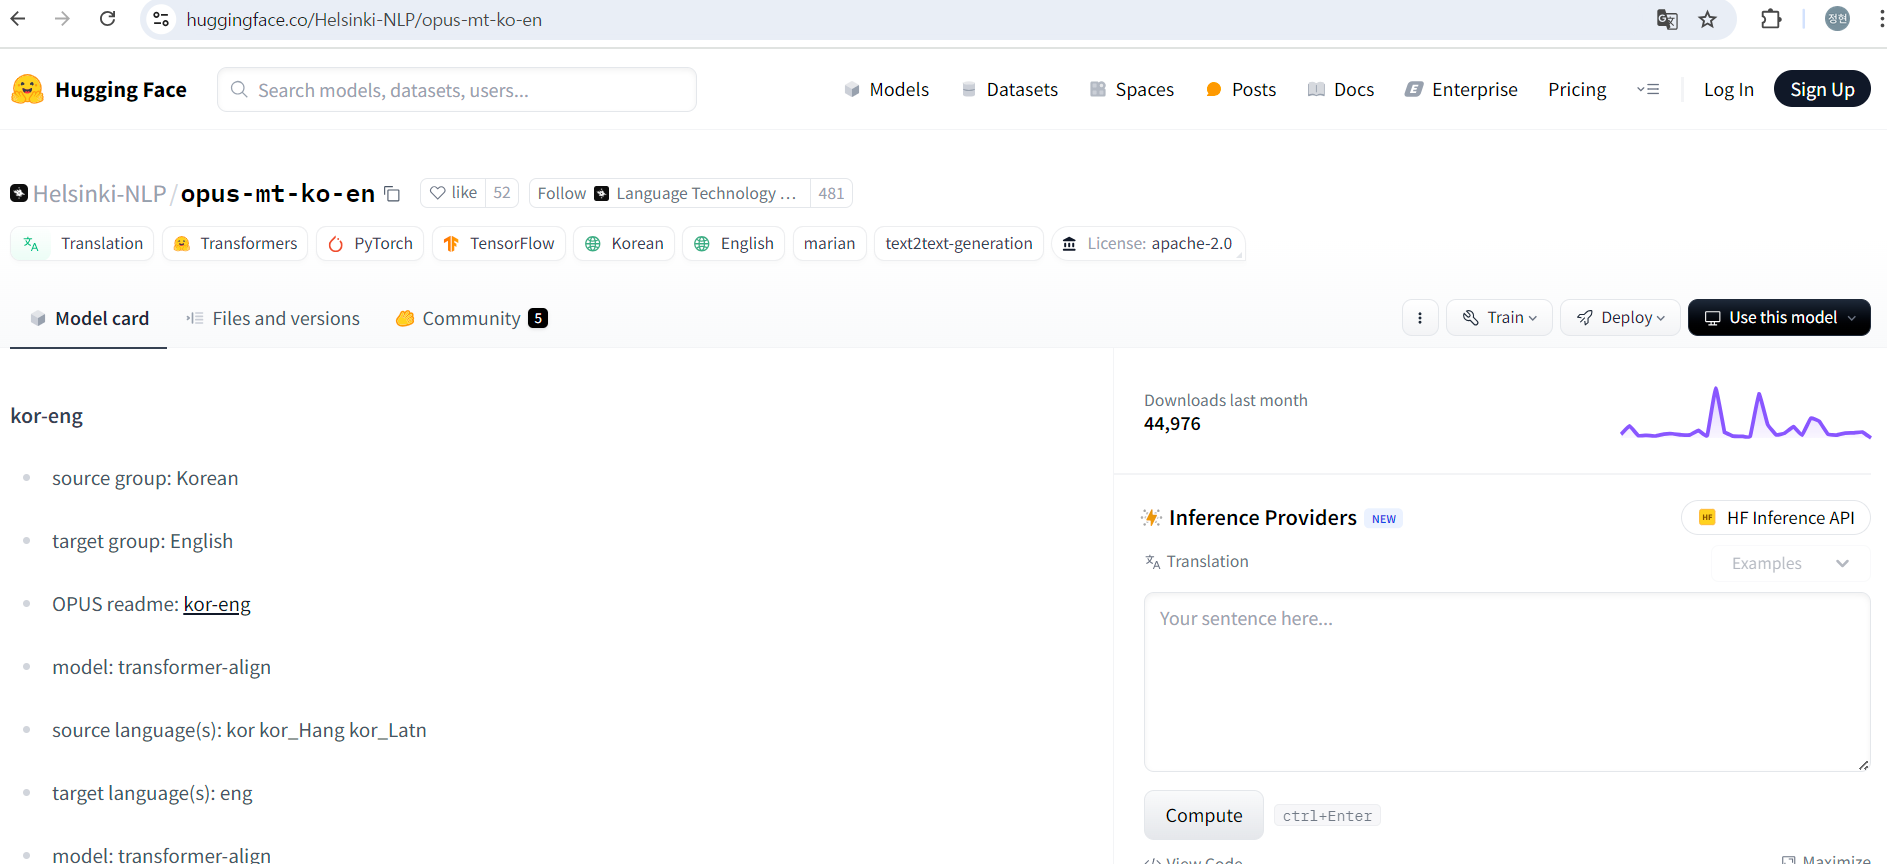

### 일부 텍스트로 텍스트 완성

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", "gpt2")
generator("In this course, we will teach you how to", pad_token_id=generator.tokenizer.eos_token_id)

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", "openai-community/gpt2")
generator("In this course, we will teach you how to", pad_token_id=generator.tokenizer.eos_token_id)

### 이미지를 설명하는 텍스트 생성

In [ ]:
from transformers import pipeline

imagetotext = pipeline("image-to-text", "ydshieh/vit-gpt2-coco-en")

In [ ]:
imagetotext("https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png", max_new_tokens=30)

In [ ]:
from PIL import Image
import requests
url = 'https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png'
image = Image.open(requests.get(url, stream=True).raw)

In [ ]:
image

In [ ]:
imagetotext("http://images.cocodataset.org/val2017/000000039769.jpg", max_new_tokens=30)

In [ ]:
from PIL import Image
import requests
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

In [ ]:
image

In [ ]:
from PIL import Image
import requests
url = 'https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202306/25/488f9638-800c-4bac-ad65-82877fbff79b.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
from transformers import pipeline
imgclassifier = pipeline("image-classification", model="google/vit-base-patch16-224")

In [ ]:
result = imgclassifier(image)
result

In [ ]:
result[0]

In [ ]:
from transformers import ViTImageProcessor, ViTForImageClassification

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax().item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

In [ ]:
predicted_class_idx

In [ ]:
model.config.id2label

### 라마를 이용한 텍스트 생성

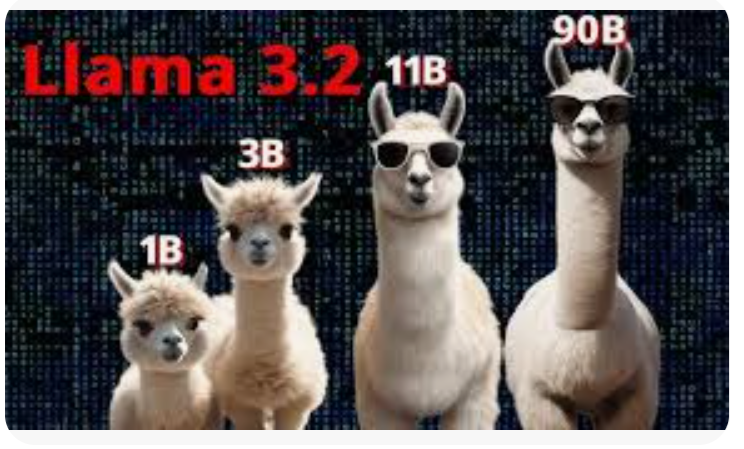

LLaMA(대형 언어 모델 메타 AI, Large Language Model Meta AI)는 Meta AI가 2023년 2월에 출시한 대규모 언어 모델(LLM)이다. 70억에서 650억 파라미터에 이르는 다양한 모델 크기가 학습되었다. LLaMA의 개발자들은 대부분의 NLP 벤치마크에서 130억 파라미터 모델의 성능이 훨씬 더 큰 GPT-3(1,750억 파라미터 포함)의 성능을 초과했으며 가장 큰 모델이 PaLM 및 Chinchilla와 같은 최신 모델과 경쟁할 수 있다고 보고했다. 가장 강력한 LLM은 일반적으로 제한된 API(있는 경우)를 통해서만 접근할 수 있는 반면, 메타는 상업적 라이선스에 따라 연구 커뮤니티에 LLaMA의 모델 가중치를 공개했다

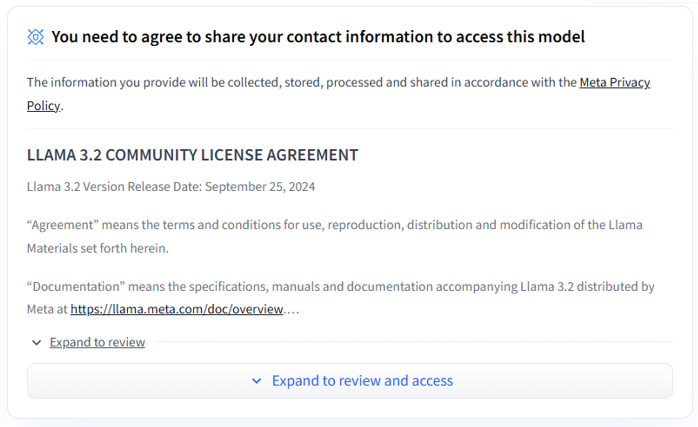

In [ ]:
from transformers import pipeline
import torch

model_id = "meta-llama/Llama-3.2-1B"

textgen = pipeline("text-generation", model=model_id, model_kwargs={"torch_dtype": torch.bfloat16})

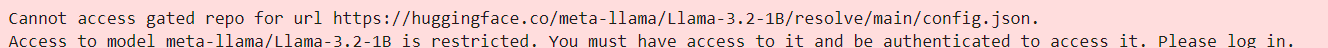

In [ ]:
import huggingface_hub

In [ ]:
huggingface_hub.login() # 로그인시 사용할 토큰 : 

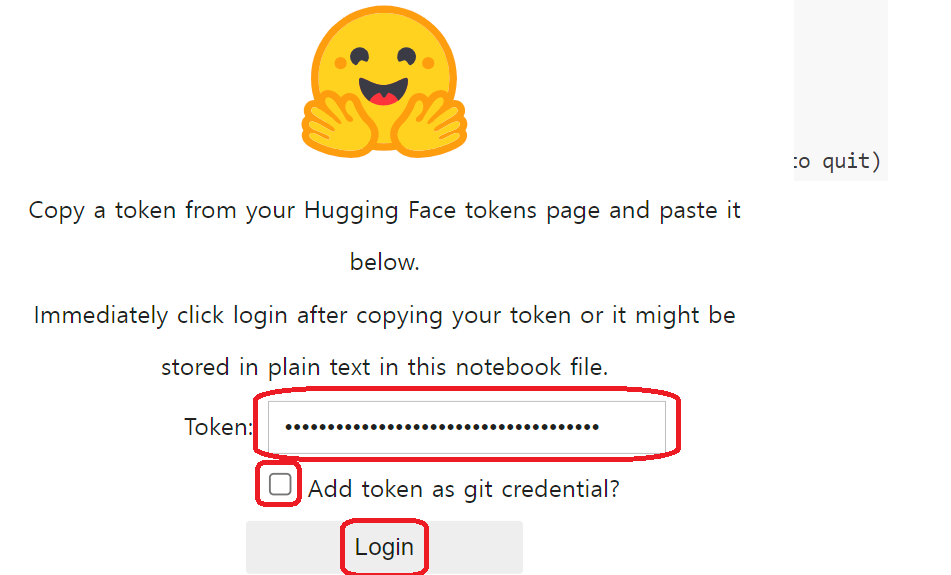

In [ ]:
textgen("Hey how are you doing today?", pad_token_id=textgen.tokenizer.eos_token_id, max_new_tokens=30)

#### Text-To-Text Transfer Transformer 재미있는 모델

In [ ]:
styles = ['문어체','구어체','안드로이드','아재','채팅',
    '초등학생','이모티콘','enfp','신사','할아버지','할머니','중학생',
    '왕','나루토','선비','소심한','번역기']

In [ ]:
from transformers import pipeline
model = pipeline('text2text-generation', model='heegyu/kobart-text-style-transfer')

In [ ]:
def transfer_text_style(text, target_style):
  input = f"{target_style} 말투로 변환:{text}"
  out = model(input, max_length=64)
  print(text, target_style, out[0]['generated_text'], sep="->")

In [ ]:
text = "반가운. 나는 6마리의 고양이를 소지하고 있다."
for style in styles:
  transfer_text_style(text, style)

In [ ]:
# 테스트는 해보지는 마세요... 너무 오래 걸림 ㅜㅜ 재미있는 샘플인데... 저도 아쉽네요..
from transformers import pipeline

musicgen = pipeline("text-to-audio", model="facebook/musicgen-small")

In [ ]:
music = musicgen("Refreshing music combining the sounds of piano and cello", forward_params={"do_sample": True})
scipy.io.wavfile.write("output/musicgen_out1.wav", rate=music["sampling_rate"], data=music["audio"])

In [ ]:
music = musicgen("Refreshing music box sound", forward_params={"do_sample": True})
scipy.io.wavfile.write("output/musicgen_out2.wav", rate=music["sampling_rate"], data=music["audio"])

In [ ]:
from transformers import pipeline
pipe = pipeline("text2text-generation", model="Xcz2568/T5-summarization-Korean1")

In [ ]:
output = pipe("""미 항공우주국(NASA)이 2014년 한반도의 밤을 위성으로 촬영해 화제가 된 사진이 있다.
빛으로 꽉 찬 한국과 달리, 북한엔 평양에만 불빛이 보일 뿐 컴컴한 어둠이 가득하다. 이 사진은 정확한 통계 자료가 부족한 북한 경제의 실상을 짐작게 하는 계기가 됐다.
이런 위성 사진과 더불어 최근엔 인공지능(AI) 기술로 북한을 좀 더 객관적으로 들여다보는 연구들이 나오고 있다.
지난해 말, 한국 카이스트(KAIST)는 기초과학연구원, 서강대, 홍콩과기대, 싱가포르국립대와 위성영상을 활용해 북한처럼 기초 데이터가 부족한 지역의 경제 상황을 분석하는 AI 기법을 개발했다. 컴퓨터 사이언스, 경제, 지리학 등 전문가 10여 명이 힘을 합친 것.
연구팀은 한국의 아리랑, 유럽의 센티넬 등 인공위성 영상을 평균 0.23㎢ 로 세밀하게 나눴다. 그리고 구역 안의 건물과 도로, 녹지 등의 시각 정보를 수치화해 AI가 경제 발전 정도를 점수로 매기도록 했다.
이를 통해 특정 기간 해당 지역에서 어느 정도의 변화가 있었는지를 비교하고 알 수 있다.
연구팀은 이 기술을 북한에 적용해 분석했다.
주요 연구진으로 참여한 김지희 카이스트 교수는 BBC 코리아에 "북한의 경우엔 대부분의 나라엔 있는 소득, 자산, 인구 등의 자료가 충분치 않기에 절대적 경제지표가 거의 없다"며 "상대적인 발전 정도라도 한번 파악해 보고 싶었다”고 연구 목적을 설명했다.
그러면서 "그동안 위성사진으로는 (변화가 있으리라 예측되는) 위치를 임의로 선정하고 추적 감시를 했는데, 개발한 AI 모델은 전지역을 감지할 수 있기 때문에 그런 과정 없이 북한 전역을 세밀하게 관측할 수 있다" 고 했다."""
)

In [ ]:
output

---

# <span style="color:red">Inference API 사용</span>

In [ ]:
from transformers import pipeline

sentiment_model = pipeline(model="WhitePeak/bert-base-cased-Korean-sentiment")

In [ ]:
sentiment_model("매우 좋아")

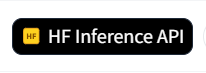

In [ ]:
import requests

API_URL = "https://api-inference.huggingface.co/models/WhitePeak/bert-base-cased-Korean-sentiment"
headers = {"Authorization": "Bearer "}

def query(payload):
    response =  requests.post(API_URL, headers=headers, json=payload)
    return response.json()

In [ ]:
output = query({
    "inputs": "매우 좋아",
})

In [ ]:
output

In [ ]:
from huggingface_hub import InferenceClient

client = InferenceClient(
    provider="hf-inference",
    api_key="",
)

result = client.text_classification(
    "나는 행복해. 정말 좋아",
    model="WhitePeak/bert-base-cased-Korean-sentiment",
)

In [ ]:
result

In [ ]:
from huggingface_hub import InferenceClient
client = InferenceClient("seawolf2357/hanbok", token="")

# output is a PIL.Image object
image = client.text_to_image("Cute two puppy illustration")

In [ ]:
image

In [ ]:
image.save('output/two_puppy.jpg',"JPEG")

In [ ]:
import requests

API_URL = "https://api-inference.huggingface.co/models/Helsinki-NLP/opus-mt-ko-en"
headers = {"Authorization": "Bearer "}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

In [ ]:
output = query({
    "inputs": "반가워요... 사전학습된 AI 모델을 사용합니다."
})

In [ ]:
output

In [ ]:
output = query({
    "inputs": "오늘은 즐거운 토요일입니다.",
})

In [ ]:
output

In [ ]:
query({
    "inputs": ["시원한 과일 2가지만 추천해주세요.", "한국에 가본적이 있나요?"] 
})

In [ ]:
import requests

API_URL = "https://api-inference.huggingface.co/models/mistralai/Mistral-7B-Instruct-v0.3"
headers = {"Authorization": "Bearer "}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

In [ ]:
output = query({
    "inputs": "Can you please let us know more details about your ",
})

In [ ]:
output

In [ ]:
query({
    "inputs": "Every day is a new opportunity to make your dreams come true.",
})

In [ ]:
import requests

API_URL = "https://api-inference.huggingface.co/models/google-t5/t5-base"
headers = {"Authorization": "Bearer "}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

In [ ]:
output = query({"inputs": "오늘은 즐거운 토요일입니다."})

In [ ]:
output # 한국어는 처리 못함

In [ ]:
query({
    "inputs": "Please tell me about Hugging Face.",
})

In [ ]:
import requests
import time

API_URL = "https://api-inference.huggingface.co/models/google-bert/bert-base-cased"
headers = {"Authorization": "Bearer "}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

In [ ]:
output = query({"inputs": "The answer to the universe is [MASK]."})

In [ ]:
output

In [ ]:
# ㅠㅠ
import requests

API_URL = "https://api-inference.huggingface.co/models/nlpconnect/vit-gpt2-image-captioning"
headers = {"Authorization": "Bearer "}

def query(filename):
    with open(filename, "rb") as f:
        data = f.read()
    response = requests.post(API_URL, headers=headers, data=data)
    return response.json()

In [ ]:
query("images/dogcat.jpg")

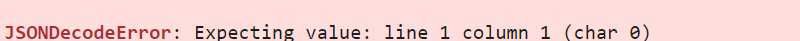

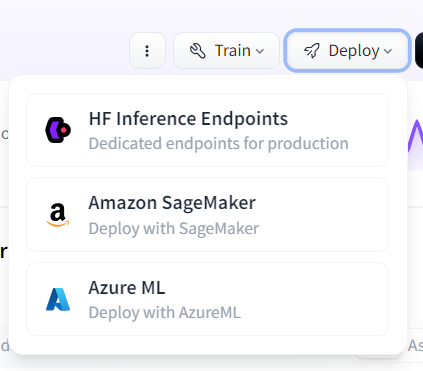

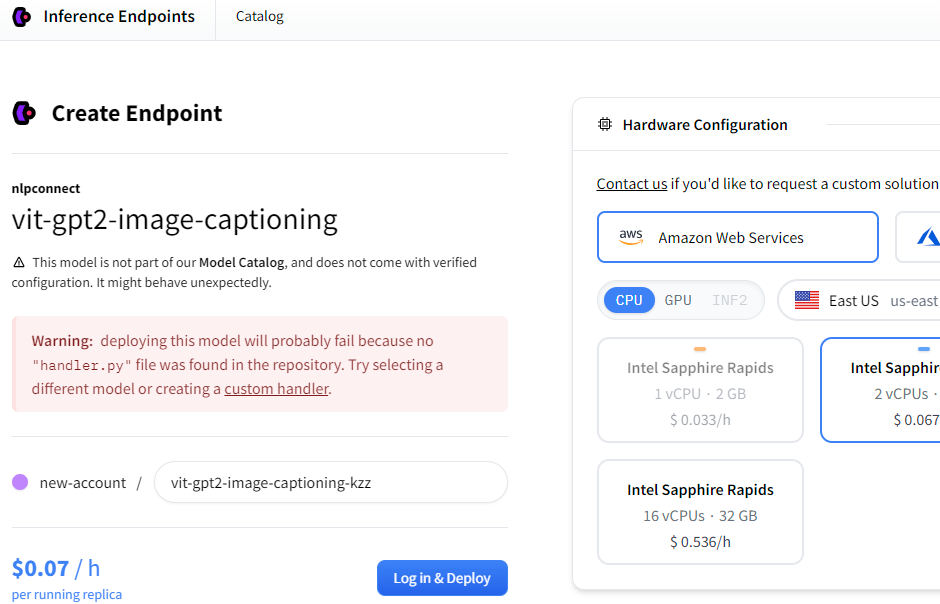

In [ ]:
from transformers import pipeline

pipe = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

In [ ]:
output = pipe("images/dogcat.jpg")

In [ ]:
output

In [ ]:
from PIL import Image
img = Image.open("images/dogcat.jpg")
img

In [ ]:
from PIL import Image
img = Image.open("images/fruits.jpeg")
img

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("zero-shot-image-classification", model="google/siglip-so400m-patch14-384")

In [ ]:
output = pipe("images/fruits.jpeg",
    candidate_labels = ["pear", "banana", "pineapple", "orange", "apple", "grape", "kiwi"]
)

In [ ]:
output

In [ ]:
from transformers import pipeline

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

In [ ]:
sentences = ["I am not having a great day"]

model_outputs = classifier(sentences)
print(model_outputs[0])

In [ ]:
from transformers import pipeline
import pandas as pd

# 다양한 파이프라인 초기화
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-mul-en")
sentiment = pipeline("sentiment-analysis")
ner = pipeline("ner", aggregation_strategy="simple")
summarizer = pipeline("summarization")

def analyze_text(text, source_lang="auto"):
    """텍스트 종합 분석 함수"""
    results = {}

    # 영어로 번역 (필요한 경우)
    if source_lang != "en":
        translation = translator(text)[0]['translation_text']
        results["translated_text"] = translation
        analysis_text = translation
    else:
        analysis_text = text

    # 감정 분석
    sentiment_result = sentiment(analysis_text)[0]
    results["sentiment"] = {
        "label": sentiment_result["label"],
        "score": round(sentiment_result["score"], 4)
    }

    # 개체명 인식
    if len(analysis_text) > 5:  # 텍스트가 충분히 긴 경우에만
        entities = ner(analysis_text)
        results["entities"] = [
            {
                "type": e["entity_group"],
                "word": e["word"],
                "confidence": round(e["score"], 4)
            } for e in entities
        ]

    # 요약 (텍스트가 충분히 긴 경우에만)
    if len(analysis_text.split()) > 30:
        summary = summarizer(
            analysis_text,
            max_length=min(100, len(analysis_text.split()) // 2),
            min_length=min(30, len(analysis_text.split()) // 3),
            do_sample=False
        )[0]['summary_text']
        results["summary"] = summary

    return results

# 테스트
text_samples = [
    "Je suis très heureux d'apprendre la programmation avec Python et l'IA. C'est fascinant!",
    "Der neue Film von Christopher Nolan war großartig. Die Spezialeffekte waren beeindruckend.",
    "Google and Microsoft are investing billions in artificial intelligence research to compete with OpenAI."
]

for i, text in enumerate(text_samples):
    print(f"\n--- 샘플 {i+1} ---")
    print(f"원문: {text}")
    results = analyze_text(text)

    if "translated_text" in results:
        print(f"번역: {results['translated_text']}")

    print(f"감정: {results['sentiment']['label']} ({results['sentiment']['score']})")

    if "entities" in results:
        print("개체명:")
        for entity in results["entities"]:
            print(f"  - {entity['word']} ({entity['type']}, {entity['confidence']})")

    if "summary" in results:
        print(f"요약: {results['summary']}")


# <span style="color:red">AutoClass 를 이용하는 방법</span>

## 사전학습된 토크나이저 로드기기

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
sequence = "In a hole in the ground there lived a hobbit."
print(tokenizer(sequence))

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

# kcbert의 tokenizer와 모델을 불러옴.
kcbert_tokenizer = AutoTokenizer.from_pretrained("beomi/kcbert-base")
kcbert = AutoModelForMaskedLM.from_pretrained("beomi/kcbert-base")

result = kcbert_tokenizer.tokenize("너는 내년 대선 때 투표할 수 있어?")
print(result)
print(kcbert_tokenizer.vocab['대선'])
print([kcbert_tokenizer.encode(token) for token in result])

In [ ]:
kcbert_tokenizer.get_vocab()

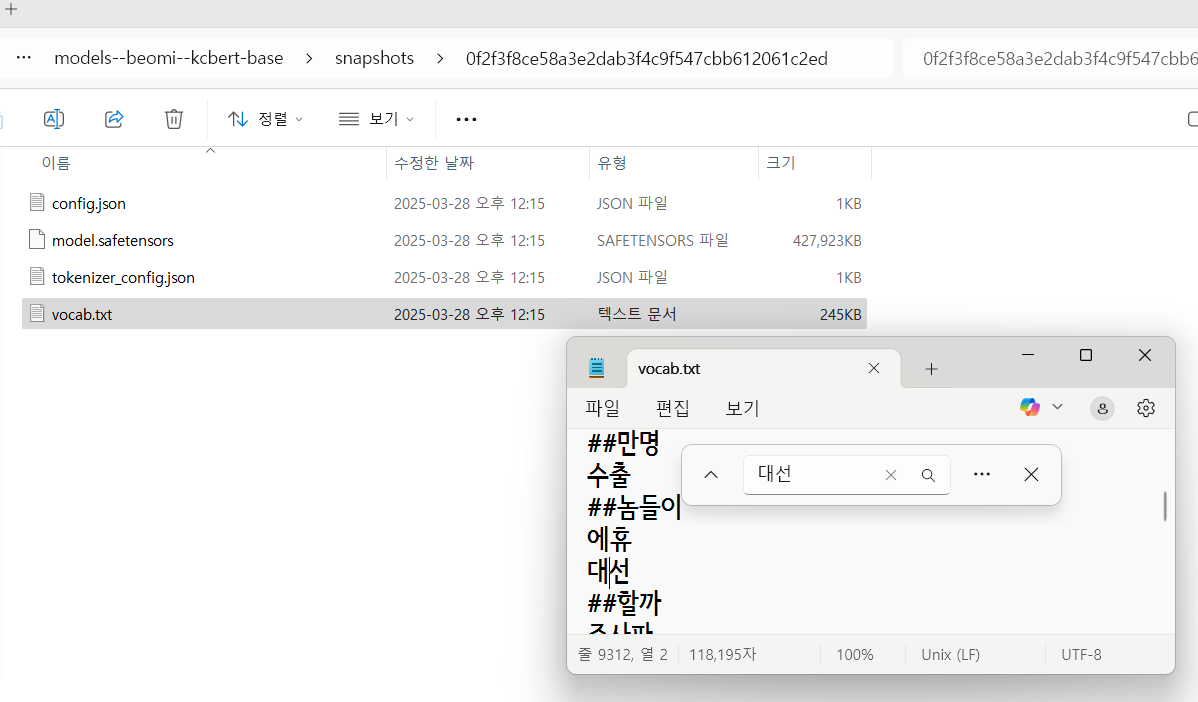

In [ ]:
from transformers import AutoModel, AutoTokenizer

kobert_tokenizer = AutoTokenizer.from_pretrained("skt/kobert-base-v1", use_fast=False)
#kobert = AutoModel.from_pretrained("skt/kobert-base-v1")

result = kobert_tokenizer.tokenize("너는 내년 대선 때 투표할 수 있어?")
print(result)
kobert_vocab = kobert_tokenizer.get_vocab()
print(kobert_vocab.get('▁대선'))
print([kobert_tokenizer.encode(token) for token in result])

In [ ]:
print(kobert_tokenizer.get_vocab())

## 토큰화 파인튜닝 예

In [ ]:
from transformers import AutoTokenizer

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
encoding = tokenizer(["It was a very informative, fun and enjoyable time.", "It was a waste of time."])
print(encoding)

### 토큰화 한 결과의 길이가 같게 조정

In [ ]:
tunning_encoding = tokenizer(
    ["It was a very informative, fun and enjoyable time.", "It was a waste of time."],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="pt",
)
print(tunning_encoding)

In [ ]:
!pip install diffusers

## AutoClass 를 이용한 파인튜닝의 예

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# 모델 및 토크나이저 불러오기
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)

In [ ]:
import torch

# 감성 레이블을 숫자로 매칭하는 딕셔너리 준비
dic = {0:'positive', 1:'neutral', 2:'negative'}

# 입력 문장 데이터
eval_list = ["I like apple", "I like pear", "I go to school", "I dislike mosquito", "I felt very sad", "I feel so good"]

# 정답 레이블(answer label)
ans = torch.tensor([0, 0, 1, 2, 2, 0])


In [ ]:
# 파인 튜닝 없는 상태에서의 추론
# 모델을 eval 모드로 전환
model.eval()

# 그래디언트(기울기) 계산 방지. eval 모드에서는 학습이 이뤄지지 않기에 이 조치가 필요
with torch.no_grad():
  for article in eval_list:

    # eval_list에 담긴 문장을 article이라는 변수에 하나씩 담아 토크나이저 인코딩
    inputs = tokenizer.encode(article, return_tensors="pt",padding=True, truncation=True)

    # 인코딩 결과를 모델에 투입
    outputs = model(inputs)

    # 로짓 추출
    logits = outputs.logits

    # 로짓의 최대값에 해당하는 인덱스를 추출하고, item( )을 통해 파이썬 숫자 형태로 변환
    # 결과적으로 위 숫자가 변수 dic에 담긴 인덱스가 되어 해당하는 문장의 감성을 출력
    print(f"{dic[logits.argmax(-1).item()]}:{article}")


### 파인 튜닝 진행(에포크는 50, 최적화 함수는 AdamW, 학습률 값은 0.00001)

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

In [ ]:
# 모델을 학습 모드로 변경
model.train()

# 에포크 수 지정 및 손실을 담은 빈 컨테이너 리스트 생성
epochs = 50
losses = []

In [ ]:
# 파인튜닝
for epoch in range(epochs):    
    optimizer.zero_grad()
    inputs = tokenizer.batch_encode_plus(eval_list, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs, labels=ans)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    losses.append(loss)
    print(f"epoch:{epoch+1}, loss:{loss}")

In [ ]:
new_losses = [i.item() for i in losses]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(new_losses);

In [ ]:
# 파인 튜닝 이후 추론
dic = {0:'positive', 1:'neutral', 2:'negative'}
eval_list = ["I like apple", "I like pear", "I go to school", "I dislike mosquito", "I felt very sad", "I feel so good"]

# 모델을 eval 모델로 전환
model.eval()

# 모델 예측을 담을 preds라는 빈 컨테이너 리스트 생성
preds = []

with torch.no_grad():
  for article in eval_list:
    inputs = tokenizer.encode(article, return_tensors="pt",padding=True, truncation=True)
    outputs = model(inputs)
    logits = outputs.logits
    pred = logits.argmax(-1).item()
    preds.append(logits.argmax(-1).item())
    print(f"{dic[pred]}:{article}")


In [ ]:
save_directory = "./mymodel/BERT_classification_save_unico_pretrained"
tokenizer.save_pretrained(save_directory)
model.save_pretrained(save_directory)

In [ ]:
model

In [ ]:
my_model = AutoModelForSequenceClassification.from_pretrained("./mymodel/BERT_classification_save_unico_pretrained")

In [ ]:
# 파인 튜닝 이후 추론
dic = {0:'positive', 1:'neutral', 2:'negative'}
eval_list = ["I like apple", "I like pear", "I go to school", "I dislike mosquito", "I felt very sad", "I feel so good"]

# 모델을 eval 모델로 전환
my_model.eval()

# 모델 예측을 담을 preds라는 빈 컨테이너 리스트 생성
preds = []

with torch.no_grad():
  for article in eval_list:
    inputs = tokenizer.encode(article, return_tensors="pt",padding=True, truncation=True)
    outputs = my_model(inputs)
    logits = outputs.logits
    pred = logits.argmax(-1).item()
    preds.append(logits.argmax(-1).item())
    print(f"{dic[pred]}:{article}")

In [ ]:
# item()에 의해 넘파이 숫자값이 된 preds를 다시 토치 텐서 타입으로 변환
import torch
preds = torch.tensor(preds)

In [ ]:
# preds 출력
preds     

In [ ]:
# 정답(ans)과 예측(preds)이 일치하는 건수를
# 정답(ans)의 전체 건수로 나누어서 정확도(Accuracy) 계산
print(f"Accuracy:{100 * sum(ans.detach().clone()==preds)/len(ans.detach().clone())}%")

## 허깅페이스의 데이터셋 활용

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
raw_datasets = load_dataset("imdb")

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))
full_train_dataset = tokenized_datasets["train"]
full_eval_dataset = tokenized_datasets["test"]

In [ ]:
small_train_dataset[0]["text"]

## 모델 양자화로 메모리 사용량 줄이기

In [ ]:
!pip install bitsandbytes

In [ ]:
generator1 = pipeline(
    "text-generation",
    model="bigscience/bloom-1b7")

In [ ]:
generator1

In [ ]:
from transformers import pipeline, BitsAndBytesConfig
import torch

# 4비트 양자화 설정
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

# 양자화된 모델 로드
generator2 = pipeline(
    "text-generation",
    model="bigscience/bloom-1b7",
    quantization_config=quantization_config
)


In [ ]:
generator

### 배치 크기 및 병렬 처리 최적화

In [ ]:
from transformers import pipeline
import time

classifier = pipeline("text-classification", device="cpu")  

# 배치 크기 실험
texts = ["Sample text"] * 1000  # 1000개 텍스트
batch_sizes = [1, 4, 8, 16, 32, 64]

for batch_size in batch_sizes:
    start_time = time.time()
    _ = classifier(texts, batch_size=batch_size)
    duration = time.time() - start_time
    print(f"배치 크기 {batch_size}: {duration:.2f}초 소요")


## 워드 임베딩

In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/static-similarity-mrl-multilingual-v1", device="cpu")
sentences = ["문장 A", "문장 B", "문장 C"]
embeddings = model.encode(sentences)
print(embeddings.shape)

In [ ]:
embeddings[1]

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("google/gemma-2-2b-it", device="cpu")

In [ ]:
model.encode("나는 사과를 좋아합니다")

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("upskyy/bge-m3-korean", device="cpu")

In [ ]:
model.encode("나는 사과를 좋아합니다")

## 벡터DB 연동

In [ ]:
!pip install pgvector

In [ ]:
!pip install psycopg

In [ ]:
import numpy as np
import ollama
from pathlib import Path
from pgvector.psycopg import register_vector
import psycopg
import urllib.request

load_data = True

conn = psycopg.connect(dbname='edudb', user='edu', password='1234', autocommit=True)
conn.execute('CREATE EXTENSION IF NOT EXISTS vector')
register_vector(conn)

if load_data:
    with open("data.txt", encoding='utf-8') as f:
        doc = f.read()
    chunks = doc.split('\n')

    input = ['search_document: ' + chunk for chunk in chunks]
    embeddings = model.encode(input)

    # create table
    conn.execute('DROP TABLE IF EXISTS hotel')
    conn.execute('CREATE TABLE hotel (id bigserial PRIMARY KEY, content text, embedding vector(1024))')

    # store chunks
    cur = conn.cursor()
    with cur.copy('COPY hotel (content, embedding) FROM STDIN WITH (FORMAT BINARY)') as copy:
        copy.set_types(['text', 'vector'])

        for content, embedding in zip(chunks, embeddings):
            copy.write_row([content, embedding])

In [ ]:
conn = psycopg.connect(dbname='edudb', user='edu', password='1234', autocommit=True)
conn.execute('CREATE EXTENSION IF NOT EXISTS vector')
register_vector(conn)

In [ ]:
#query = '룸 서비스에 대해 궁금합니다.'
query = '채크인과 채크아웃 시간을 알려주세요.'
#query = '취소 정책에 대해서 알려주세요'
input = 'search_query: '+query
embedding =  model.encode(input)
print(embedding)

In [ ]:
(np.array(embedding),)

In [ ]:
# retrieve chunks
result = conn.execute('SELECT content FROM hotel ORDER BY embedding <=> %s LIMIT 1',  (np.array(embedding),)).fetchall()
context = '\n\n'.join([row[0] for row in result])

# get answer
# TODO improve prompt
prompt = f'Answer this question: {query}\n\n{context}'
from transformers import pipeline

pipe = pipeline("text-generation", model="google/gemma-3-1b-it")
response = pipe(prompt)
print(response)

In [ ]:
prompt

In [ ]:
context

In [ ]:
len(embedding)

In [ ]:
result

### 지금까지 여러분들은 다음 3가지 방법을 사용하여 허깅 페이스에 올려진 모델의 사용 방법을 경험하였습니다.

- pipeline() 함수 사용
- Inference API 사용
- AutoClass 사용
- Embedding Model 사용